In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
!gdown 1ho4fWmr1THutOF44gM2s50l_PMALM3Tk
!gdown 1NSVg9MfGkBcqOF9PMqx-LM3z8ogkVu2-
!gdown 1iCokZiJ9OoDys0J1l4G8UniVRR4iTMeK
# !gdown 1okMywjJg-kNtOngKmnoHOgzqIxedEZfK

Downloading...
From: https://drive.google.com/uc?id=1ho4fWmr1THutOF44gM2s50l_PMALM3Tk
To: /content/timeseries_proj - data1.csv
100% 8.40k/8.40k [00:00<00:00, 16.9MB/s]
Downloading...
From: https://drive.google.com/uc?id=1NSVg9MfGkBcqOF9PMqx-LM3z8ogkVu2-
To: /content/timeseries_proj - targetvar.csv
100% 2.08k/2.08k [00:00<00:00, 7.69MB/s]
Downloading...
From: https://drive.google.com/uc?id=1iCokZiJ9OoDys0J1l4G8UniVRR4iTMeK
To: /content/timeseries_proj - media.csv
100% 1.82k/1.82k [00:00<00:00, 4.94MB/s]


In [ ]:
df_media = pd.read_csv("timeseries_proj - media.csv")
df_media.head()

,TIMEDESC,Vehicle,CAMPAIGN,Spend
0,6/17/19,Digital,Ad1,152123.968800
1,6/24/19,Digital,Ad1,152123.206000
2,10/6/19,Digital,Ad1,152122.389900
3,1/7/19,Traditional,TV_ad1,7397.507571
4,1/8/19,Traditional,TV_ad1,5171.557764


In [ ]:
df_media.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   TIMEDESC  48 non-null     object 
 1   Vehicle   48 non-null     object 
 2   CAMPAIGN  48 non-null     object 
 3   Spend     48 non-null     float64
dtypes: float64(1), object(3)
memory usage: 1.6+ KB


In [ ]:
df_media['TIMEDESC'] = pd.to_datetime(df_media['TIMEDESC'], format='%m/%d/%y')

In [ ]:
df_media['Weeks'] = df_media['TIMEDESC'].dt.strftime('%Y%U')
# df_media = df_media[df_media['TIMEDESC'] <= pd.to_datetime('2019-10-31')]


In [ ]:
df_media.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   TIMEDESC  48 non-null     datetime64[ns]
 1   Vehicle   48 non-null     object        
 2   CAMPAIGN  48 non-null     object        
 3   Spend     48 non-null     float64       
 4   Weeks     48 non-null     object        
dtypes: datetime64[ns](1), float64(1), object(3)
memory usage: 2.0+ KB


In [ ]:
df_media.head(10)

,TIMEDESC,Vehicle,CAMPAIGN,Spend,Weeks
0,2019-06-17,Digital,Ad1,152123.968800,201924
1,2019-06-24,Digital,Ad1,152123.206000,201925
2,2019-10-06,Digital,Ad1,152122.389900,201940
3,2019-01-07,Traditional,TV_ad1,7397.507571,201901
4,2019-01-08,Traditional,TV_ad1,5171.557764,201901
5,2019-03-06,Traditional,TV_ad1,8645.511881,201909
6,2019-05-08,Traditional,TV_ad1,140312.618800,201918
7,2019-06-17,Traditional,TV_ad1,276792.813200,201924
8,2019-06-24,Traditional,TV_ad1,276793.010900,201925
9,2019-07-15,Traditional,TV_ad1,24319.705790,201928


In [ ]:
df_pivot = df_media.drop('TIMEDESC', axis = 1)
df_pivot.head()

,Vehicle,CAMPAIGN,Spend,Weeks
0,Digital,Ad1,152123.968800,201924
1,Digital,Ad1,152123.206000,201925
2,Digital,Ad1,152122.389900,201940
3,Traditional,TV_ad1,7397.507571,201901
4,Traditional,TV_ad1,5171.557764,201901


In [ ]:
df_pivot = pd.pivot_table(
    df_pivot,
    values= 'Spend',
    index= 'Weeks',
    columns= ['Vehicle', 'CAMPAIGN'],
    aggfunc='sum',
    margins= True,
    margins_name = 'Total'

)
df_pivot = df_pivot.fillna(0)
df_pivot = df_pivot.sort_index()
df_pivot.head()

Vehicle  Digital                              Sponsorship Traditional  \
CAMPAIGN     Ad1          Ad2      Others Experimental_ad      Others   
Weeks                                                                   
201850       0.0      0.00000    0.000000     83333.94331         0.0   
201851       0.0      0.00000    0.000000     83335.16602         0.0   
201852       0.0      0.00000    0.000000     11905.64780         0.0   
201900       0.0      0.00000  337.918567         0.00000         0.0   
201901       0.0  21088.99356    0.000000         0.00000         0.0   

Vehicle                                       Total  
CAMPAIGN        TV_ad1        TV_ad2                 
Weeks                                                
201850        0.000000       0.00000   83333.943310  
201851        0.000000       0.00000   83335.166020  
201852        0.000000       0.00000   11905.647800  
201900        0.000000       0.00000     337.918567  
201901    12569.065335  165700.89407  199358.952965

In [ ]:
df_pivot.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27 entries, 201850 to Total
Data columns (total 8 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   (Digital, Ad1)                  27 non-null     float64
 1   (Digital, Ad2)                  27 non-null     float64
 2   (Digital, Others)               27 non-null     float64
 3   (Sponsorship, Experimental_ad)  27 non-null     float64
 4   (Traditional, Others)           27 non-null     float64
 5   (Traditional, TV_ad1)           27 non-null     float64
 6   (Traditional, TV_ad2)           27 non-null     float64
 7   (Total, )                       27 non-null     float64
dtypes: float64(8)
memory usage: 1.9+ KB


In [ ]:
df_pivot.columns = ['_'.join(col).strip() for col in df_pivot.columns.values]

In [ ]:
df_pivot = df_pivot.reset_index()

In [ ]:
df_pivot.head()

,Weeks,Digital_Ad1,Digital_Ad2,Digital_Others,Sponsorship_Experimental_ad,Traditional_Others,Traditional_TV_ad1,Traditional_TV_ad2,Total_
0,201850,0.0,0.00000,0.000000,83333.94331,0.0,0.000000,0.00000,83333.943310
1,201851,0.0,0.00000,0.000000,83335.16602,0.0,0.000000,0.00000,83335.166020
2,201852,0.0,0.00000,0.000000,11905.64780,0.0,0.000000,0.00000,11905.647800
3,201900,0.0,0.00000,337.918567,0.00000,0.0,0.000000,0.00000,337.918567
4,201901,0.0,21088.99356,0.000000,0.00000,0.0,12569.065335,165700.89407,199358.952965


In [ ]:
df_pivot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Weeks                        27 non-null     object 
 1   Digital_Ad1                  27 non-null     float64
 2   Digital_Ad2                  27 non-null     float64
 3   Digital_Others               27 non-null     float64
 4   Sponsorship_Experimental_ad  27 non-null     float64
 5   Traditional_Others           27 non-null     float64
 6   Traditional_TV_ad1           27 non-null     float64
 7   Traditional_TV_ad2           27 non-null     float64
 8   Total_                       27 non-null     float64
dtypes: float64(8), object(1)
memory usage: 2.0+ KB


In [ ]:
df_sales = pd.read_csv("timeseries_proj - data1.csv")
df_sales.head()

,Weeks,l7d_Base,l7d,p4w_Base,p4w_Base.1,p4w,p3m_Base,p3m_Base.1,p3m,MeetNeeds_Base,MeetNeeds,TotalAwareness_Base,TotalAwareness,FirstMention_Base,FirstMention,Affinity_Base,Affinity
0,201801,77,1.38%,74,77,9.64%,74,78,27.58%,70,25.20%,76,93.25%,77,-,72,26.65%
1,201802,59,1.73%,58,61,6.70%,58,62,13.23%,53,17.09%,63,90.04%,60,-,57,14.80%
2,201803,44,-,39,41,7.65%,39,44,27.32%,41,12.58%,44,97.65%,41,-,41,23.20%
3,201804,55,-,50,55,3.87%,50,53,11.63%,50,6.24%,51,92.59%,54,-,50,8.63%
4,201805,50,2.15%,45,48,4.30%,45,47,19.69%,38,10.65%,50,82.47%,48,-,39,15.78%


In [ ]:
df_sales['Weeks'] = df_sales['Weeks'].astype(str)

In [ ]:
df_merge = pd.merge(df_pivot, df_sales, on='Weeks', how='inner')

In [ ]:
df_merge.head()

,Weeks,Digital_Ad1,Digital_Ad2,Digital_Others,Sponsorship_Experimental_ad,Traditional_Others,Traditional_TV_ad1,Traditional_TV_ad2,Total_,l7d_Base,...,p3m_Base.1,p3m,MeetNeeds_Base,MeetNeeds,TotalAwareness_Base,TotalAwareness,FirstMention_Base,FirstMention,Affinity_Base,Affinity
0,201850,0.0,0.00000,0.000000,83333.94331,0.0,0.000000,0.00000,83333.943310,83,...,83,18.26%,77,15.79%,85,92.60%,85,-,80,22.41%
1,201851,0.0,0.00000,0.000000,83335.16602,0.0,0.000000,0.00000,83335.166020,43,...,41,17.47%,40,11.45%,41,87.57%,42,-,38,8.61%
2,201901,0.0,21088.99356,0.000000,0.00000,0.0,12569.065335,165700.89407,199358.952965,75,...,72,18.58%,67,11.53%,76,88.42%,76,1.41%,63,11.07%
3,201902,0.0,0.00000,2422.315809,0.00000,0.0,0.000000,0.00000,2422.315809,132,...,132,15.35%,124,15.64%,133,93.30%,133,0.78%,124,13.15%
4,201903,0.0,0.00000,2422.742326,0.00000,0.0,0.000000,0.00000,2422.742326,127,...,125,17.03%,110,7.57%,126,85.38%,126,-,108,14.04%


In [ ]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 25 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Weeks                        24 non-null     object 
 1   Digital_Ad1                  24 non-null     float64
 2   Digital_Ad2                  24 non-null     float64
 3   Digital_Others               24 non-null     float64
 4   Sponsorship_Experimental_ad  24 non-null     float64
 5   Traditional_Others           24 non-null     float64
 6   Traditional_TV_ad1           24 non-null     float64
 7   Traditional_TV_ad2           24 non-null     float64
 8   Total_                       24 non-null     float64
 9   l7d_Base                     24 non-null     int64  
 10  l7d                          24 non-null     object 
 11  p4w_Base                     24 non-null     int64  
 12  p4w_Base.1                   24 non-null     int64  
 13  p4w                   

In [ ]:
df_target = pd.read_csv("timeseries_proj - targetvar.csv")
df_target.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   TIMEDESC  99 non-null     int64  
 1   target1   99 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 1.7 KB


In [ ]:
df_target.rename(columns={'TIMEDESC': 'Weeks'}, inplace= True)
df_target['Weeks'] = df_target['Weeks'].astype(str)
df_target.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Weeks    99 non-null     object 
 1   target1  99 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB


In [ ]:
df = pd.merge(df_merge, df_target, on='Weeks')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 26 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Weeks                        21 non-null     object 
 1   Digital_Ad1                  21 non-null     float64
 2   Digital_Ad2                  21 non-null     float64
 3   Digital_Others               21 non-null     float64
 4   Sponsorship_Experimental_ad  21 non-null     float64
 5   Traditional_Others           21 non-null     float64
 6   Traditional_TV_ad1           21 non-null     float64
 7   Traditional_TV_ad2           21 non-null     float64
 8   Total_                       21 non-null     float64
 9   l7d_Base                     21 non-null     int64  
 10  l7d                          21 non-null     object 
 11  p4w_Base                     21 non-null     int64  
 12  p4w_Base.1                   21 non-null     int64  
 13  p4w                   

In [ ]:
df.head(20)

,Weeks,Digital_Ad1,Digital_Ad2,Digital_Others,Sponsorship_Experimental_ad,Traditional_Others,Traditional_TV_ad1,Traditional_TV_ad2,Total_,l7d_Base,...,p3m,MeetNeeds_Base,MeetNeeds,TotalAwareness_Base,TotalAwareness,FirstMention_Base,FirstMention,Affinity_Base,Affinity,target1
0,201850,0.0000,0.000000,0.000000,83333.94331,0.0000,0.000000,0.00000,83333.943310,83,...,18.26%,77,15.79%,85,92.60%,85,-,80,22.41%,0.132857
1,201851,0.0000,0.000000,0.000000,83335.16602,0.0000,0.000000,0.00000,83335.166020,43,...,17.47%,40,11.45%,41,87.57%,42,-,38,8.61%,0.126077
2,201901,0.0000,21088.993560,0.000000,0.00000,0.0000,12569.065335,165700.89407,199358.952965,75,...,18.58%,67,11.53%,76,88.42%,76,1.41%,63,11.07%,0.118401
3,201902,0.0000,0.000000,2422.315809,0.00000,0.0000,0.000000,0.00000,2422.315809,132,...,15.35%,124,15.64%,133,93.30%,133,0.78%,124,13.15%,0.098307
4,201903,0.0000,0.000000,2422.742326,0.00000,0.0000,0.000000,0.00000,2422.742326,127,...,17.03%,110,7.57%,126,85.38%,126,-,108,14.04%,0.095422
5,201904,0.0000,0.000000,1385.148311,0.00000,0.0000,0.000000,0.00000,1385.148311,92,...,16.06%,84,11.89%,95,90.82%,92,-,88,13.38%,0.086361
6,201906,0.0000,9022.252974,0.000000,0.00000,0.0000,0.000000,0.00000,9022.252974,117,...,12.42%,100,15.01%,113,88.50%,113,-,102,13.01%,0.119062
7,201909,0.0000,0.000000,0.000000,0.00000,0.0000,8645.511881,0.00000,8645.511881,107,...,19.00%,95,12.95%,108,87.56%,109,-,97,14.05%,0.108170
8,201918,0.0000,77896.779580,0.000000,0.00000,108376.7228,140312.618800,0.00000,326586.121180,114,...,18.00%,88,18.90%,113,76.58%,115,-,89,17.67%,0.130416
9,201924,152123.9688,0.000000,23400.250880,0.00000,0.0000,276792.813200,0.00000,452317.032880,83,...,20.52%,79,13.36%,82,96.17%,82,1.27%,77,17.34%,0.122901


In [ ]:
df['FirstMention'].value_counts()

FirstMention
-        13
1.41%     1
0.78%     1
1.27%     1
0.89%     1
1.71%     1
1.22%     1
1.77%     1
1.84%     1
Name: count, dtype: int64

In [ ]:
df = df.replace('-', np.nan)
df.head()

,Weeks,Digital_Ad1,Digital_Ad2,Digital_Others,Sponsorship_Experimental_ad,Traditional_Others,Traditional_TV_ad1,Traditional_TV_ad2,Total_,l7d_Base,...,p3m,MeetNeeds_Base,MeetNeeds,TotalAwareness_Base,TotalAwareness,FirstMention_Base,FirstMention,Affinity_Base,Affinity,target1
0,201850,0.0,0.00000,0.000000,83333.94331,0.0,0.000000,0.00000,83333.943310,83,...,18.26%,77,15.79%,85,92.60%,85,NaN,80,22.41%,0.132857
1,201851,0.0,0.00000,0.000000,83335.16602,0.0,0.000000,0.00000,83335.166020,43,...,17.47%,40,11.45%,41,87.57%,42,NaN,38,8.61%,0.126077
2,201901,0.0,21088.99356,0.000000,0.00000,0.0,12569.065335,165700.89407,199358.952965,75,...,18.58%,67,11.53%,76,88.42%,76,1.41%,63,11.07%,0.118401
3,201902,0.0,0.00000,2422.315809,0.00000,0.0,0.000000,0.00000,2422.315809,132,...,15.35%,124,15.64%,133,93.30%,133,0.78%,124,13.15%,0.098307
4,201903,0.0,0.00000,2422.742326,0.00000,0.0,0.000000,0.00000,2422.742326,127,...,17.03%,110,7.57%,126,85.38%,126,NaN,108,14.04%,0.095422


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 26 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Weeks                        21 non-null     object 
 1   Digital_Ad1                  21 non-null     float64
 2   Digital_Ad2                  21 non-null     float64
 3   Digital_Others               21 non-null     float64
 4   Sponsorship_Experimental_ad  21 non-null     float64
 5   Traditional_Others           21 non-null     float64
 6   Traditional_TV_ad1           21 non-null     float64
 7   Traditional_TV_ad2           21 non-null     float64
 8   Total_                       21 non-null     float64
 9   l7d_Base                     21 non-null     int64  
 10  l7d                          18 non-null     object 
 11  p4w_Base                     21 non-null     int64  
 12  p4w_Base.1                   21 non-null     int64  
 13  p4w                   

In [ ]:
df.drop(['p4w_Base', 'p3m_Base'], axis=1, inplace = True)

In [ ]:
df['l7d'].head()

0    1.22%
1      NaN
2      NaN
3    1.64%
4      NaN
Name: l7d, dtype: object

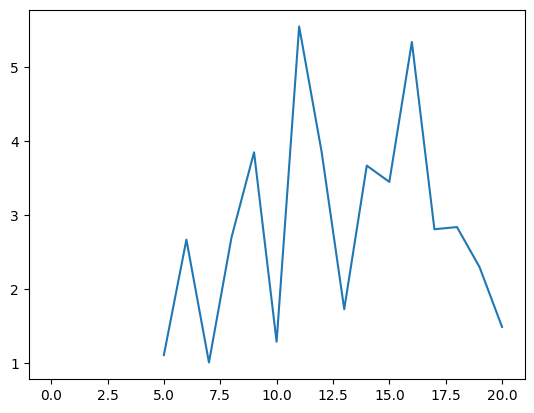

In [ ]:
df['l7d'] = df['l7d'].str.replace('%', '')
df['l7d'] = pd.to_numeric(df['l7d'], errors='coerce')

plt.plot(df['l7d'])
plt.show()

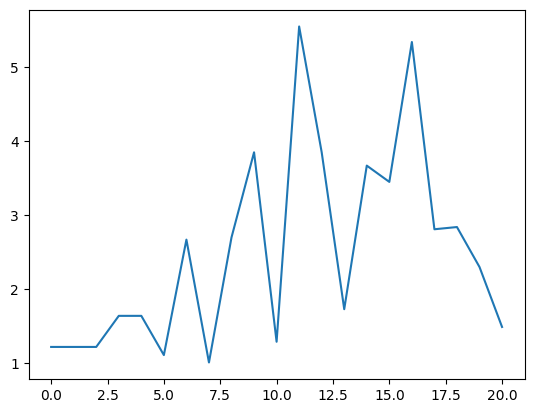

In [ ]:
df['l7d'].fillna(method='ffill', inplace=True)

plt.plot(df['l7d'])
plt.show()

In [ ]:
df = df.applymap(lambda x:x.replace('%', '') if isinstance(x, str) else x)
df.head()

,Weeks,Digital_Ad1,Digital_Ad2,Digital_Others,Sponsorship_Experimental_ad,Traditional_Others,Traditional_TV_ad1,Traditional_TV_ad2,Total_,l7d_Base,...,p3m,MeetNeeds_Base,MeetNeeds,TotalAwareness_Base,TotalAwareness,FirstMention_Base,FirstMention,Affinity_Base,Affinity,target1
0,201850,0.0,0.00000,0.000000,83333.94331,0.0,0.000000,0.00000,83333.943310,83,...,18.26,77,15.79,85,92.60,85,NaN,80,22.41,0.132857
1,201851,0.0,0.00000,0.000000,83335.16602,0.0,0.000000,0.00000,83335.166020,43,...,17.47,40,11.45,41,87.57,42,NaN,38,8.61,0.126077
2,201901,0.0,21088.99356,0.000000,0.00000,0.0,12569.065335,165700.89407,199358.952965,75,...,18.58,67,11.53,76,88.42,76,1.41,63,11.07,0.118401
3,201902,0.0,0.00000,2422.315809,0.00000,0.0,0.000000,0.00000,2422.315809,132,...,15.35,124,15.64,133,93.30,133,0.78,124,13.15,0.098307
4,201903,0.0,0.00000,2422.742326,0.00000,0.0,0.000000,0.00000,2422.742326,127,...,17.03,110,7.57,126,85.38,126,NaN,108,14.04,0.095422


In [ ]:
df = df.apply(pd.to_numeric, errors= 'coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 24 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Weeks                        21 non-null     int64  
 1   Digital_Ad1                  21 non-null     float64
 2   Digital_Ad2                  21 non-null     float64
 3   Digital_Others               21 non-null     float64
 4   Sponsorship_Experimental_ad  21 non-null     float64
 5   Traditional_Others           21 non-null     float64
 6   Traditional_TV_ad1           21 non-null     float64
 7   Traditional_TV_ad2           21 non-null     float64
 8   Total_                       21 non-null     float64
 9   l7d_Base                     21 non-null     int64  
 10  l7d                          21 non-null     float64
 11  p4w_Base.1                   21 non-null     int64  
 12  p4w                          21 non-null     float64
 13  p3m_Base.1            

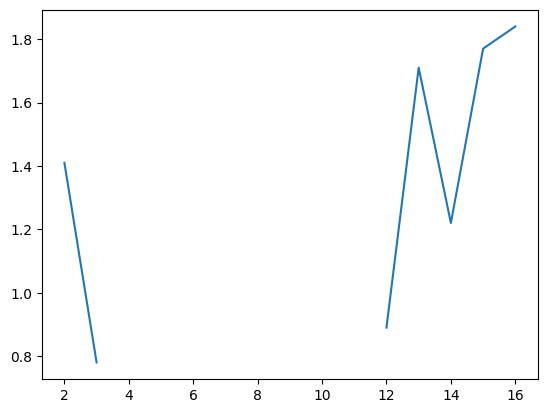

In [ ]:
plt.plot(df['FirstMention'])
plt.show()

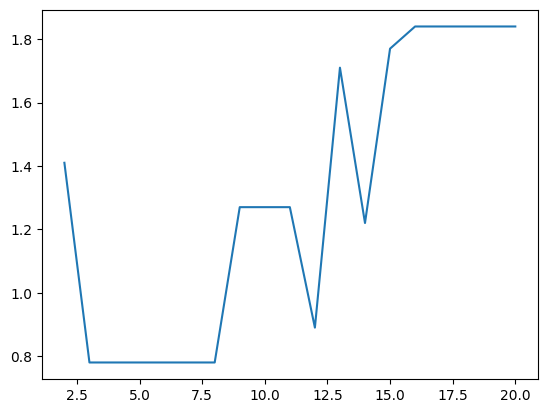

In [ ]:
df['FirstMention'].fillna(method='ffill', inplace=True)

plt.plot(df['FirstMention'])
plt.show()

In [ ]:
mean_FirstMention = df['FirstMention'].mean()
df['FirstMention'].fillna(mean_FirstMention, inplace = True)
df['FirstMention'].isna().sum()

0

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 24 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Weeks                        21 non-null     int64  
 1   Digital_Ad1                  21 non-null     float64
 2   Digital_Ad2                  21 non-null     float64
 3   Digital_Others               21 non-null     float64
 4   Sponsorship_Experimental_ad  21 non-null     float64
 5   Traditional_Others           21 non-null     float64
 6   Traditional_TV_ad1           21 non-null     float64
 7   Traditional_TV_ad2           21 non-null     float64
 8   Total_                       21 non-null     float64
 9   l7d_Base                     21 non-null     int64  
 10  l7d                          21 non-null     float64
 11  p4w_Base.1                   21 non-null     int64  
 12  p4w                          21 non-null     float64
 13  p3m_Base.1            

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from statsmodels.tsa.statespace.sarimax import SARIMAX

train_size = int(len(df)*0.8)
train, test = df[:train_size], df[train_size:]

features = df.columns.difference(['target1'])
X_train, y_train = train[features], train['target1']
X_test, y_test = test[features], test['target1']

exog_train = train[features]
exog_test = test[features]

model_sarimax = SARIMAX(y_train, exog=exog_train, order = (5,1,0))
model_fit_sarimax = model_sarimax.fit()

forecast_sarimax = model_fit_sarimax.forecast(steps = len(test), exog = exog_test)

sarimax_mse = mean_squared_error(y_test, forecast_sarimax)
sarimax_mae = mean_absolute_error(y_test, forecast_sarimax)
print(f'SARIMAX MSE: {sarimax_mse}, SARIMAX MAE: {sarimax_mae}')


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


SARIMAX MSE: 0.0034094222529495906, SARIMAX MAE: 0.0535983208013575


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


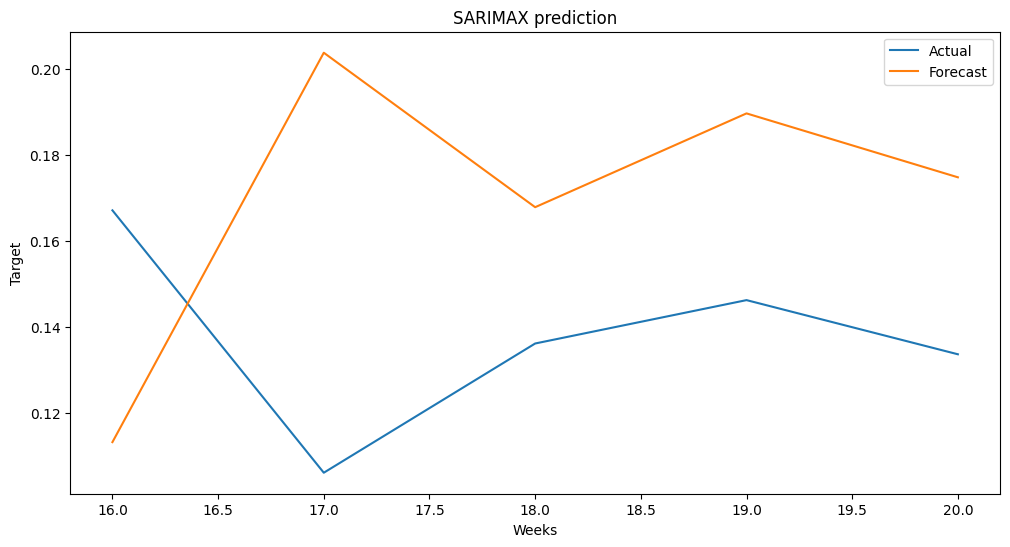

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(y_test.index, y_test, label = 'Actual')
plt.plot(y_test.index, forecast_sarimax, label = 'Forecast')
plt.xlabel('Weeks')
plt.ylabel('Target')
plt.title('SARIMAX prediction')
plt.legend()
plt.show()

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

# Assuming df is your original DataFrame with a 'Weeks' column as the time index and 'target1' as the target variable

# Create lagged versions of the target variable
lags = 3
for lag in range(1, lags + 1):
    df[f'target1_lag_{lag}'] = df['target1'].shift(lag)

df.dropna(inplace=True)

additional_features = ['Digital_Ad1', 'Digital_Ad2', 'Digital_Others', 'Sponsorship_Experimental_ad',
                       'Traditional_Others', 'Traditional_TV_ad1', 'Traditional_TV_ad2',
                       'l7d_Base', 'l7d', 'p4w_Base.1', 'p4w', 'p3m_Base.1', 'p3m',
                       'MeetNeeds_Base', 'MeetNeeds', 'TotalAwareness_Base', 'TotalAwareness',
                       'FirstMention_Base', 'FirstMention', 'Affinity_Base', 'Affinity']
lagged_features = [f'target1_lag_{lag}' for lag in range(1, lags + 1)]
features = additional_features + lagged_features

# Define features (X) and target variable (y)
X = df[features]
y = df['target1']


In [ ]:
df.head(20)

,Weeks,Digital_Ad1,Digital_Ad2,Digital_Others,Sponsorship_Experimental_ad,Traditional_Others,Traditional_TV_ad1,Traditional_TV_ad2,Total_,l7d_Base,...,TotalAwareness_Base,TotalAwareness,FirstMention_Base,FirstMention,Affinity_Base,Affinity,target1,target1_lag_1,target1_lag_2,target1_lag_3
3,201902,0.0000,0.000000,2422.315809,0.0,0.0000,0.000000,0.00000,2422.315809,132,...,133,93.30,133,0.78,124,13.15,0.098307,0.118401,0.126077,0.132857
4,201903,0.0000,0.000000,2422.742326,0.0,0.0000,0.000000,0.00000,2422.742326,127,...,126,85.38,126,0.78,108,14.04,0.095422,0.098307,0.118401,0.126077
5,201904,0.0000,0.000000,1385.148311,0.0,0.0000,0.000000,0.00000,1385.148311,92,...,95,90.82,92,0.78,88,13.38,0.086361,0.095422,0.098307,0.118401
6,201906,0.0000,9022.252974,0.000000,0.0,0.0000,0.000000,0.00000,9022.252974,117,...,113,88.50,113,0.78,102,13.01,0.119062,0.086361,0.095422,0.098307
7,201909,0.0000,0.000000,0.000000,0.0,0.0000,8645.511881,0.00000,8645.511881,107,...,108,87.56,109,0.78,97,14.05,0.108170,0.119062,0.086361,0.095422
8,201918,0.0000,77896.779580,0.000000,0.0,108376.7228,140312.618800,0.00000,326586.121180,114,...,113,76.58,115,0.78,89,17.67,0.130416,0.108170,0.119062,0.086361
9,201924,152123.9688,0.000000,23400.250880,0.0,0.0000,276792.813200,0.00000,452317.032880,83,...,82,96.17,82,1.27,77,17.34,0.122901,0.130416,0.108170,0.119062
10,201925,152123.2060,0.000000,23400.773420,0.0,0.0000,276793.010900,0.00000,452316.990320,80,...,82,92.29,79,1.27,75,16.74,0.084304,0.122901,0.130416,0.108170
11,201926,0.0000,0.000000,2421.124922,0.0,0.0000,0.000000,0.00000,2421.124922,77,...,73,94.40,75,1.27,69,19.11,0.113041,0.084304,0.122901,0.130416
12,201928,0.0000,104518.061300,0.000000,0.0,0.0000,24319.705790,132561.52640,261399.293490,109,...,109,89.62,108,0.89,95,22.57,0.155696,0.113041,0.084304,0.122901


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18 entries, 3 to 20
Data columns (total 27 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Weeks                        18 non-null     int64  
 1   Digital_Ad1                  18 non-null     float64
 2   Digital_Ad2                  18 non-null     float64
 3   Digital_Others               18 non-null     float64
 4   Sponsorship_Experimental_ad  18 non-null     float64
 5   Traditional_Others           18 non-null     float64
 6   Traditional_TV_ad1           18 non-null     float64
 7   Traditional_TV_ad2           18 non-null     float64
 8   Total_                       18 non-null     float64
 9   l7d_Base                     18 non-null     int64  
 10  l7d                          18 non-null     float64
 11  p4w_Base.1                   18 non-null     int64  
 12  p4w                          18 non-null     float64
 13  p3m_Base.1                 

In [ ]:
# Split the data into training and testing sets
train_size = int(len(df) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]


In [ ]:
# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

Mean Squared Error: 0.001987866050682598


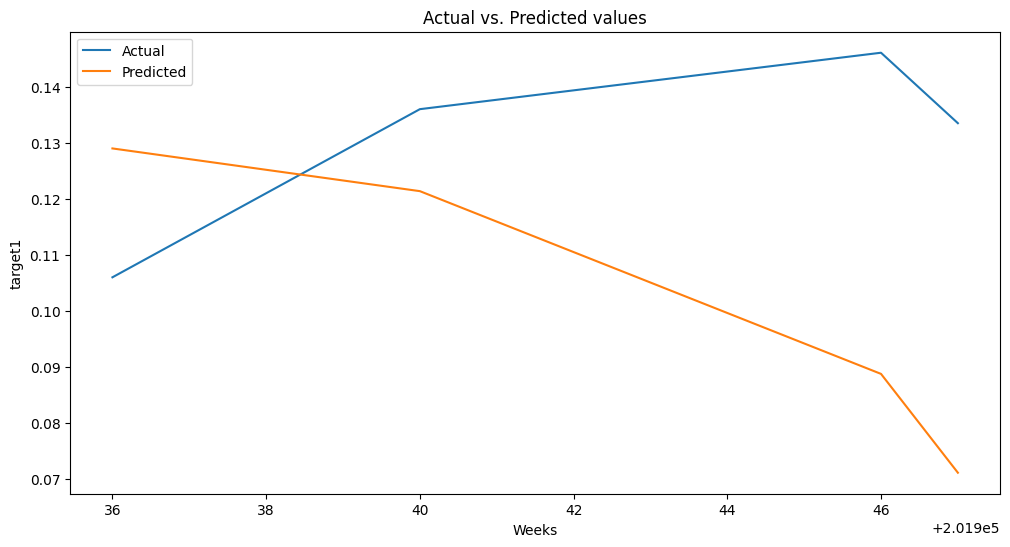

In [ ]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate and print the mean squared error
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Plot the actual vs. predicted values
plt.figure(figsize=(12, 6))
plt.plot(df['Weeks'][train_size:], y_test, label='Actual')
plt.plot(df['Weeks'][train_size:], y_pred, label='Predicted')
plt.xlabel('Weeks')
plt.ylabel('target1')
plt.title('Actual vs. Predicted values')
plt.legend()
plt.show()


In [ ]:
# Get the coefficients of the model
coefficients = model.coef_

# Get the feature names
feature_names = X_train.columns

# Combine the feature names and coefficients into a DataFrame for better readability
coeff_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
})

# Display the coefficients
print(coeff_df)


                        Feature   Coefficient
0                   Digital_Ad1  1.474124e-06
1                   Digital_Ad2 -4.737283e-07
2                Digital_Others -1.726299e-05
3   Sponsorship_Experimental_ad  2.078728e-14
4            Traditional_Others  4.951567e-07
5            Traditional_TV_ad1  5.211432e-07
6            Traditional_TV_ad2  6.087277e-07
7                      l7d_Base  5.291662e-04
8                           l7d  3.102227e-03
9                    p4w_Base.1  2.975059e-03
10                          p4w -2.310340e-03
11                   p3m_Base.1  7.074541e-04
12                          p3m  1.775748e-03
13               MeetNeeds_Base  5.100990e-03
14                    MeetNeeds -1.746564e-03
15          TotalAwareness_Base -6.311870e-03
16               TotalAwareness  2.057612e-03
17            FirstMention_Base -3.791785e-04
18                 FirstMention  5.553811e-04
19                Affinity_Base -1.984321e-03
20                     Affinity -8

In [ ]:
# !pip install pystan==2.19.1.1
# !pip install prophet

In [ ]:
import datetime

def convert_yyyyww_to_datetime(yyyyww):
    year = int(str(yyyyww)[:4])
    week = int(str(yyyyww)[4:])
    return pd.to_datetime(f'{year}-W{week-1}-1', format='%Y-W%W-%w')

df['Weeks'] = df['Weeks'].apply(convert_yyyyww_to_datetime)

print(df.head())


       Weeks  Digital_Ad1  Digital_Ad2  Digital_Others  \
0 2018-12-03          0.0      0.00000        0.000000   
1 2018-12-10          0.0      0.00000        0.000000   
2 2018-12-31          0.0  21088.99356        0.000000   
3 2019-01-07          0.0      0.00000     2422.315809   
4 2019-01-14          0.0      0.00000     2422.742326   

   Sponsorship_Experimental_ad  Traditional_Others  Traditional_TV_ad1  \
0                  83333.94331                 0.0            0.000000   
1                  83335.16602                 0.0            0.000000   
2                      0.00000                 0.0        12569.065335   
3                      0.00000                 0.0            0.000000   
4                      0.00000                 0.0            0.000000   

   Traditional_TV_ad2         Total_  l7d_Base  ...    p3m  MeetNeeds_Base  \
0             0.00000   83333.943310        83  ...  18.26              77   
1             0.00000   83335.166020        43  ..

In [ ]:
df_prophet = df.rename(columns={'Weeks': 'ds', 'target1': 'y'})

# Ensure other columns are used as regressors
regressors = df_prophet.columns.difference(['ds', 'y']).tolist()

# Print to verify
print(df_prophet.head())


          ds  Digital_Ad1  Digital_Ad2  Digital_Others  \
0 2018-12-03          0.0      0.00000        0.000000   
1 2018-12-10          0.0      0.00000        0.000000   
2 2018-12-31          0.0  21088.99356        0.000000   
3 2019-01-07          0.0      0.00000     2422.315809   
4 2019-01-14          0.0      0.00000     2422.742326   

   Sponsorship_Experimental_ad  Traditional_Others  Traditional_TV_ad1  \
0                  83333.94331                 0.0            0.000000   
1                  83335.16602                 0.0            0.000000   
2                      0.00000                 0.0        12569.065335   
3                      0.00000                 0.0            0.000000   
4                      0.00000                 0.0            0.000000   

   Traditional_TV_ad2         Total_  l7d_Base  ...    p3m  MeetNeeds_Base  \
0             0.00000   83333.943310        83  ...  18.26              77   
1             0.00000   83335.166020        43  ..

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 15.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp3egajp2t/541t1voo.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp3egajp2t/6yohqe7o.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=64463', 'data', 'file=/tmp/tmp3egajp2t/541t1voo.json', 'init=/tmp/tmp3egajp2t/6yohqe7o.json', 'output', 'file=/tmp/tmp3egajp2t/prophet_modelar48d0cm/prophet_model-20240521112955.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
11:29:55 - cmdstanpy - INFO - Chain [1] start processing
I

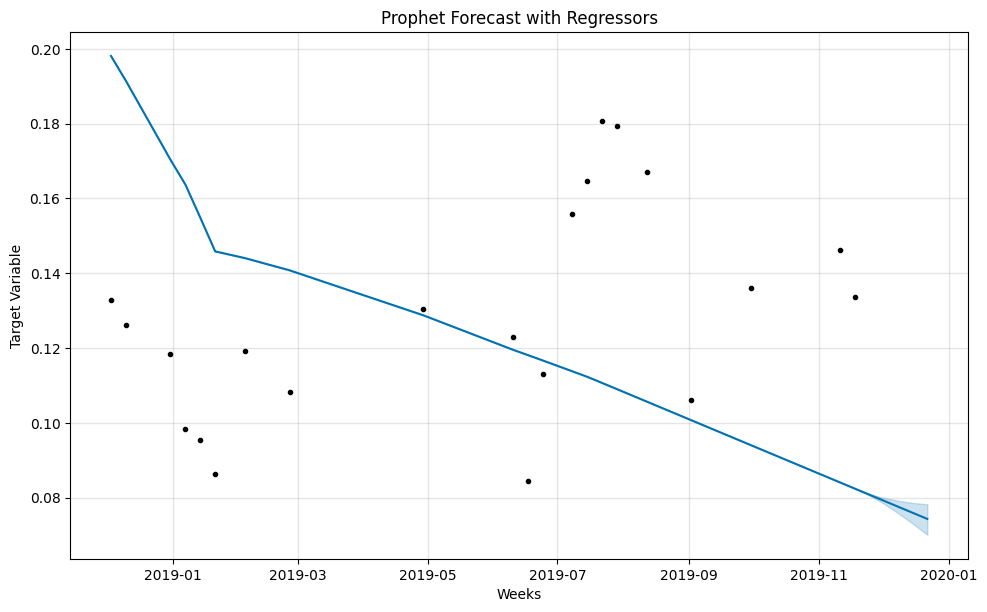

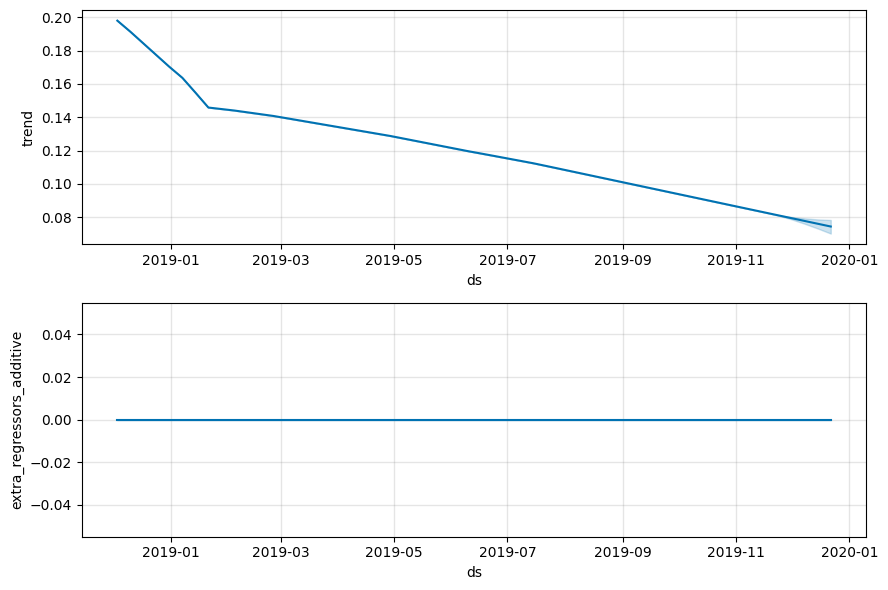

In [ ]:
from prophet import Prophet
import matplotlib.pyplot as plt

# # Initialize Prophet model
# model = Prophet()

# # Add regressors to the model
# for regressor in regressors:
#     model.add_regressor(regressor)

# # Fit the model
# model.fit(df_prophet)

# # Create future dataframe
# future = model.make_future_dataframe(periods=5, freq='W')  # Ensure frequency is set to weeks

# # Include regressors in the future DataFrame
# # Assuming the mean value for future regressors (or use more sophisticated approach)
# for regressor in regressors:
#     future[regressor] = df_prophet[regressor].mean()

# # Make predictions
# forecast = model.predict(future)

# # Plot the forecast
# fig = model.plot(forecast)
# plt.xlabel('Weeks')
# plt.ylabel('Target Variable')
# plt.title('Prophet Forecast with Regressors')
# plt.show()

# # Plot components
# fig2 = model.plot_components(forecast)
# plt.show()


In [ ]:
# Assuming df_prophet is your prepared DataFrame with Prophet-compatible format
# Sort by the 'ds' column to ensure data is in chronological order
df_prophet_sorted = df_prophet.sort_values('ds')

# Slice the dataset to keep only the last 4-5 weeks
last_weeks_data = df_prophet_sorted.tail(5)  # Adjust the number of weeks as needed


In [ ]:
# Slice the dataset to exclude the last 4-5 weeks
historical_data = df_prophet_sorted.iloc[:-5]

# Initialize Prophet model
model = Prophet()

# Add regressors to the model
for regressor in regressors:
    model.add_regressor(regressor)

# Fit the model on historical data
model.fit(historical_data)


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 11.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp3egajp2t/d_eajgof.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp3egajp2t/oj0wm7cd.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=8526', 'data', 'file=/tmp/tmp3egajp2t/d_eajgof.json', 'init=/tmp/tmp3egajp2t/oj0wm7cd.json', 'output', 'file=/tmp/tmp3egajp2t/prophet_modelocdrcsyu/prophet_model-20240521113744.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
11:37:44 - cmdstanpy - INFO - Chain [1] start processing
IN

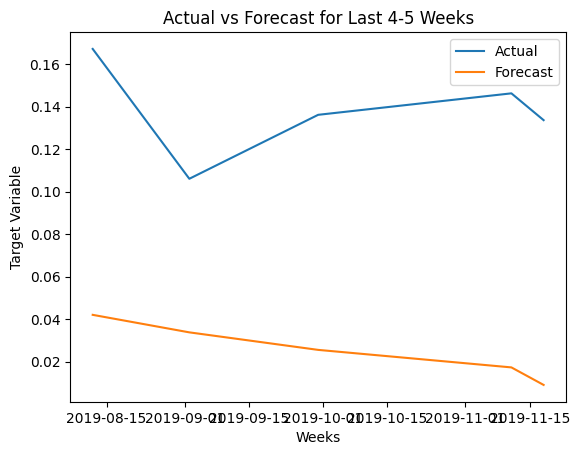

In [ ]:
# Create future dataframe for the last 4-5 weeks
future_last_weeks = model.make_future_dataframe(periods=5, freq='W')  # Adjust the number of weeks as needed
future_last_weeks = future_last_weeks.tail(5)  # Select only the last 5 weeks

# Include regressors in the future DataFrame
# Assuming the mean value for future regressors (or use more sophisticated approach)
for regressor in regressors:
    future_last_weeks[regressor] = df_prophet[regressor].mean()

# Make predictions for the last 4-5 weeks
forecast_last_weeks = model.predict(future_last_weeks)

# Extract actual values for the last 4-5 weeks
actual_last_weeks = df_prophet_sorted.tail(5)

# Plot the comparison
plt.plot(actual_last_weeks['ds'], actual_last_weeks['y'], label='Actual')
plt.plot(actual_last_weeks['ds'], forecast_last_weeks['yhat'], label='Forecast')
plt.xlabel('Weeks')
plt.ylabel('Target Variable')
plt.title('Actual vs Forecast for Last 4-5 Weeks')
plt.legend()
plt.show()
